## 1. 分类练习
对census_income数据集进行预处理（包括但不限于填充缺失值、数据标准化、标称数据编码）。  
以最后一列“>50K”为正类，“<=50K”为负类，选择至少4中分类模型进行建模，并进行结果评估和比较。

http://archive.ics.uci.edu/ml/datasets/Census+Income 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nms = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status'
                                        , 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                                       'hours-per-week', 'native-country', 'result']
df = pd.read_csv('adult.data', names = nms)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [50]:
df.replace(' ?', np.nan, inplace = True)
df.replace('nan', np.nan, inplace = True)
df.replace('nan', np.nan, inplace = True)
df.info()

df['workclass'].fillna(df['workclass'].value_counts().index[0], inplace = True)
df['occupation'].fillna(df['occupation'].value_counts().index[0], inplace = True)
df['native-country'].fillna(df['native-country'].value_counts().index[0], inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  result          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  result          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [87]:
from sklearn.utils import shuffle
df = shuffle(df)

X = df[nms[0:13]]
Y = df[nms[14]]

X = pd.get_dummies(X)

lb = X.columns
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
26058,26,188767,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1302,58,186791,10,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
5387,24,119704,9,0,0,40,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
28011,28,215955,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4729,69,628797,10,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,23,184699,9,0,0,40,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
30924,39,252327,4,0,0,40,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
30741,62,214288,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
22891,23,376416,9,0,0,40,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_std

array([[-0.92239303, -0.00958202, -0.42005962, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 1.42360965, -0.0283033 , -0.03136003, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       [-1.0690182 , -0.6639077 , -0.42005962, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       ...,
       [ 1.71685999,  0.23221236, -0.42005962, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [-1.14233079,  1.76826659, -0.42005962, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [-1.43558112,  1.58487198, -0.42005962, ...,  0.4130197 ,
         1.42233076, -1.42233076]])

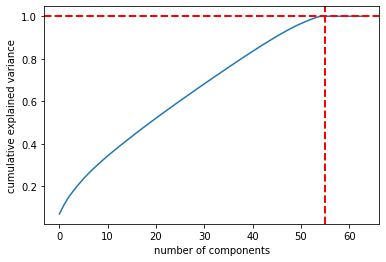

In [89]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
fig, ax=plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x = 55, c = 'r', ls = '--', lw = 2)
plt.axhline(y = 1, c = 'r', ls = '--', lw = 2)
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance')
plt.show()

In [90]:
X_std.shape

(32561, 64)

In [91]:
X_train = X_std[:30000]
X_valid = X_std[30000:]

from sklearn.linear_model import LogisticRegression
#Y.value_counts()
y_all = Y.map({' >50K':1, ' <=50K':0}).map(int)
y_train = y_all[:30000]
y_ans = y_all[30000:]
lr = LogisticRegression(C = 10000.0, random_state = 1, max_iter = 8000)
lr.fit(X_train, y_train)
y_score_lr = lr.predict_proba(X_valid)

y_pred_lr = lr.predict(X_valid)
ac = (y_pred_lr == y_ans).sum() / y_ans.size
print(ac)

0.8512299882858259


In [92]:
from sklearn.ensemble import RandomForestClassifier
fst = RandomForestClassifier(criterion='gini', n_estimators=180,random_state=1,n_jobs = 3)
fst.fit(X_train,y_train)
y_score_fst = fst.predict_proba(X_valid)

y_pred_fst = fst.predict(X_valid)
ac = (y_pred_fst == y_ans).sum() / y_ans.size
print(ac)

0.8512299882858259


In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=5,metric="minkowski", algorithm = 'kd_tree')
knn.fit(X_train,y_train)
y_score_knn = knn.predict_proba(X_valid)

y_pred_knn = knn.predict(X_valid)
ac = (y_pred_knn == y_ans).sum() / y_ans.size
print(ac)

0.8227254978524015


In [94]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state=1,C=1.0, max_iter = 2000,probability = True)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_valid)
y_score_svm = svm.predict_proba(X_valid)
ac = (y_pred_svm == y_ans).sum() / y_ans.size
print(ac)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.7922686450605232


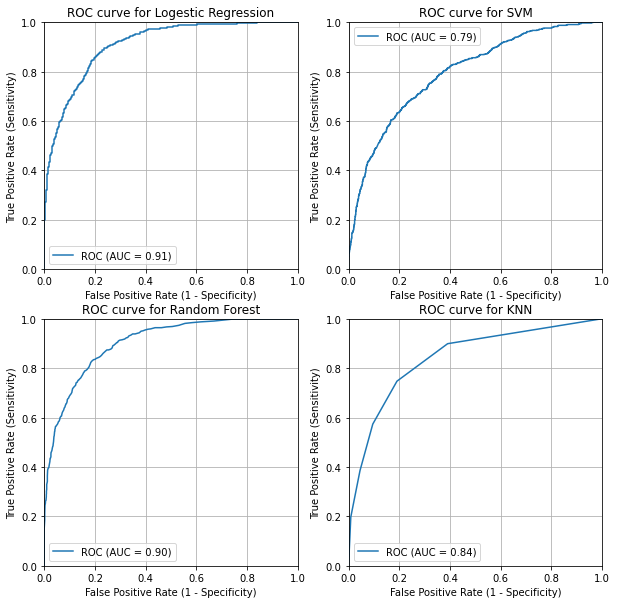

In [95]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_ans, y_score_lr[:, 1])

f = plt.figure(figsize = (10, 10))
f.add_subplot(2, 2, 1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'ROC (AUC = {0:.2f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logestic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)


fpr, tpr, thresholds = roc_curve(y_ans, y_score_svm[:, 1])
f.add_subplot(2, 2, 2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'ROC (AUC = {0:.2f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for SVM')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

fpr, tpr, thresholds = roc_curve(y_ans, y_score_fst[:, 1])
f.add_subplot(2, 2, 3)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'ROC (AUC = {0:.2f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

fpr, tpr, thresholds = roc_curve(y_ans, y_score_knn[:, 1])
f.add_subplot(2, 2, 4)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'ROC (AUC = {0:.2f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for KNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

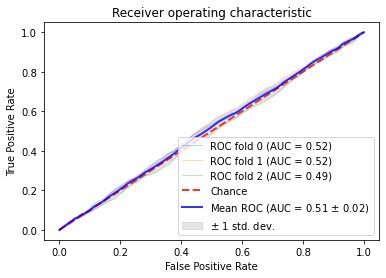

In [96]:
from sklearn.model_selection import ShuffleSplit
from numpy import interp

cv = ShuffleSplit(n_splits=3)
classifier = RandomForestClassifier(criterion='gini', n_estimators=180,n_jobs = 3)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_std, y_all):
    probas_ = classifier.fit(X_std[train], y_all[train]).predict_proba(X_std[test])
    fpr, tpr, thresholds = roc_curve(y_all[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 2. 聚类练习
对预处理后的census_income数据集中除最后一列的所有特征选择不同模型进行聚类，并进行结果比较和解释。

In [97]:
X_std

array([[-0.92239303, -0.00958202, -0.42005962, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 1.42360965, -0.0283033 , -0.03136003, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       [-1.0690182 , -0.6639077 , -0.42005962, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       ...,
       [ 1.71685999,  0.23221236, -0.42005962, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [-1.14233079,  1.76826659, -0.42005962, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [-1.43558112,  1.58487198, -0.42005962, ...,  0.4130197 ,
         1.42233076, -1.42233076]])

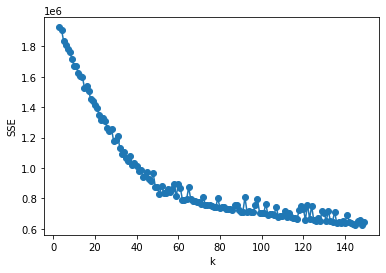

In [98]:
from sklearn.cluster import MiniBatchKMeans
SSE = []
for k in range(3, 150):
    estimator = MiniBatchKMeans(n_clusters=k, batch_size = 4000) 
    estimator.fit(X_std)
    SSE.append(estimator.inertia_)
    plt.xlabel('k')
kk = range(3, 150)
plt.ylabel('SSE')
plt.plot(kk,SSE,'o-')
plt.show()

100 以上误差平方和的下降非常缓慢，选择聚成 100 类

In [119]:
from sklearn.cluster import MiniBatchKMeans
KM = MiniBatchKMeans(n_clusters=100, batch_size = 4000)
KM_pred = KM.fit(X_std)

In [120]:
centres = KM.cluster_centers_
for i, kind in enumerate(centres):
    print('type %d' %i)
    for j, EV in enumerate(kind):
        if EV > 0.5:
            print(lb[j],end='    ')
    print('\n')

type 0
education-num    education_ Bachelors    marital-status_ Never-married    occupation_ Sales    relationship_ Not-in-family    

type 1
age    workclass_ Private    education_ Bachelors    marital-status_ Married-civ-spouse    occupation_ Prof-specialty    relationship_ Husband    sex_ Male    

type 2
education_ HS-grad    marital-status_ Never-married    occupation_ Machine-op-inspct    occupation_ Other-service    relationship_ Unmarried    race_ Black    sex_ Female    

type 3
education_ HS-grad    marital-status_ Never-married    occupation_ Craft-repair    relationship_ Own-child    sex_ Male    

type 4
age    marital-status_ Divorced    occupation_ Other-service    relationship_ Not-in-family    sex_ Female    

type 5
workclass_ Self-emp-not-inc    education_ HS-grad    marital-status_ Married-civ-spouse    occupation_ Exec-managerial    relationship_ Husband    sex_ Male    

type 6
workclass_ Without-pay    education_ HS-grad    occupation_ Farming-fishing    occupati

In [121]:
from sklearn.metrics import silhouette_score
labels = KM.labels_
s = silhouette_score(X_std, labels)
print(s)

0.17207357238443236

In [129]:
from sklearn import metrics
ss = metrics.calinski_harabasz_score(X_std, labels)
print(ss)

655.8520232786861


In [109]:
from sklearn.cluster import Birch
Bc = Birch(n_clusters = None)
Bc_pred = Bc.fit(X_std)

In [110]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering()
AC_pred = AC.fit(X_std)

### 3. 关联规则练习
利用data_generater读取“store_data.csv”并进行关联规则挖掘，找出支持度不小于0.0045，置信度不小于0.2的关联规则，并对结果进行解释。

In [134]:
import pandas as pd
from efficient_apriori import apriori
def data_generator(filename):
    """
    Data generator, needs to return a generator to be called several times.
    """
    def data_gen():
        with open(filename) as file:
            for line in file:
                yield tuple(k.strip() for k in line.split(','))
    return data_gen

In [136]:
transactions = data_generator("store_data.csv")
itemsets, rules = apriori(transactions, min_support=0.0045,  min_confidence=0.2)
itemsets

{1: {('green grapes',): 68,
  ('energy drink',): 200,
  ('whole weat flour',): 70,
  ('spinach',): 53,
  ('tomato juice',): 228,
  ('mineral water',): 1788,
  ('cottage cheese',): 239,
  ('yams',): 86,
  ('salad',): 37,
  ('antioxydant juice',): 67,
  ('low fat yogurt',): 574,
  ('frozen smoothie',): 475,
  ('olive oil',): 494,
  ('vegetables mix',): 193,
  ('avocado',): 250,
  ('green tea',): 991,
  ('honey',): 356,
  ('almonds',): 153,
  ('salmon',): 319,
  ('shrimp',): 536,
  ('eggs',): 1348,
  ('meatballs',): 157,
  ('burgers',): 654,
  ('turkey',): 469,
  ('whole wheat rice',): 439,
  ('milk',): 972,
  ('energy bar',): 203,
  ('whole wheat pasta',): 221,
  ('french fries',): 1282,
  ('shallot',): 58,
  ('light cream',): 117,
  ('soup',): 379,
  ('frozen vegetables',): 715,
  ('spaghetti',): 1306,
  ('pet food',): 49,
  ('cookies',): 603,
  ('cooking oil',): 383,
  ('champagne',): 351,
  ('chocolate',): 1229,
  ('chicken',): 450,
  ('oil',): 173,
  ('tomatoes',): 513,
  ('fresh tun

In [137]:
rules

[{almonds} -> {green tea},
 {almonds} -> {mineral water},
 {avocado} -> {mineral water},
 {cottage cheese} -> {green tea},
 {cottage cheese} -> {mineral water},
 {energy drink} -> {mineral water},
 {frozen smoothie} -> {mineral water},
 {green tea} -> {mineral water},
 {tomato juice} -> {green tea},
 {honey} -> {mineral water},
 {low fat yogurt} -> {mineral water},
 {olive oil} -> {mineral water},
 {salmon} -> {mineral water},
 {shrimp} -> {mineral water},
 {tomato juice} -> {mineral water},
 {vegetables mix} -> {mineral water},
 {burgers} -> {eggs},
 {energy bar} -> {milk},
 {energy bar} -> {mineral water},
 {mineral water} -> {milk},
 {milk} -> {mineral water},
 {whole wheat rice} -> {milk},
 {whole wheat rice} -> {mineral water},
 {frozen vegetables} -> {spaghetti},
 {green tea} -> {spaghetti},
 {burgers} -> {mineral water},
 {cooking oil} -> {eggs},
 {cooking oil} -> {mineral water},
 {mineral water} -> {eggs},
 {eggs} -> {mineral water},
 {turkey} -> {eggs},
 {turkey} -> {mineral 

In [138]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
result = sorted(rules_rhs, key=lambda rule: rule.lift)

for rule in result:
    print(rule)

{yogurt cake} -> {mineral water} (conf: 0.205, supp: 0.006, lift: 0.860, conv: 0.958)
{energy drink} -> {mineral water} (conf: 0.210, supp: 0.006, lift: 0.881, conv: 0.964)
{escalope} -> {mineral water} (conf: 0.215, supp: 0.017, lift: 0.902, conv: 0.970)
{light mayo} -> {mineral water} (conf: 0.230, supp: 0.006, lift: 0.967, conv: 0.990)
{parmesan cheese} -> {mineral water} (conf: 0.235, supp: 0.005, lift: 0.985, conv: 0.995)
{green tea} -> {mineral water} (conf: 0.235, supp: 0.031, lift: 0.986, conv: 0.996)
{strawberries} -> {mineral water} (conf: 0.237, supp: 0.005, lift: 0.996, conv: 0.999)
{energy bar} -> {mineral water} (conf: 0.251, supp: 0.007, lift: 1.054, conv: 1.017)
{light mayo} -> {eggs} (conf: 0.201, supp: 0.005, lift: 1.118, conv: 1.027)
{fresh bread} -> {eggs} (conf: 0.201, supp: 0.009, lift: 1.120, conv: 1.027)
{chocolate} -> {eggs} (conf: 0.203, supp: 0.033, lift: 1.127, conv: 1.029)
{ground beef} -> {eggs} (conf: 0.204, supp: 0.020, lift: 1.133, conv: 1.030)
{butter}

关联规则：

+ 淡奶油 $\rightarrow$ 鸡肉：未找到相关菜谱，不知道怎么解释

+ 意大利面 $\rightarrow$ 肉片：可能是意大利面的原料

+ 意大利面 $\rightarrow$ 虾：可能是意大利面的原料

+ 全麦意面 $\rightarrow$ 橄榄油：原料